## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

In [10]:
#Import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
#Import the training data.
df = pd.read_csv("bigmart_train.csv")
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [12]:
#Check the shape of the data.
df.shape

(8523, 12)

In [13]:
#Check for null values in the dataset.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#Data Set description.
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

**Univariate analysis of the attribute.**

In [15]:
#Univarite Analysis on Item identifier.
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


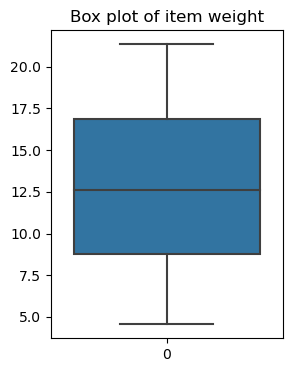

In [16]:
#Univarite Analysis on Item Weight.
plt.figure(figsize = (3,4))
sns.boxplot(df["Item_Weight"])
plt.title("Box plot of item weight")
print(df["Item_Weight"].describe())

In [17]:
#Univarite Analysis on Item Fat Content.
df["Item_Fat_Content"].unique()
#Observations: "low fat" and "LF" are same as "Low Fat". Also, "reg" is same as "Regular".

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


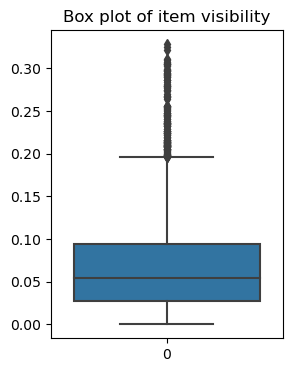

In [18]:
#Univarite Analysis on Item Visibility.
plt.figure(figsize = (3,4))
sns.boxplot(df["Item_Visibility"])
plt.title("Box plot of item visibility")
print(df["Item_Visibility"].describe())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<Axes: >

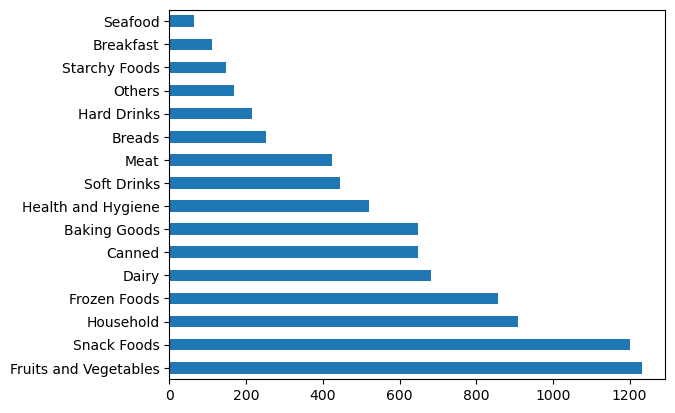

In [19]:
#Univarite Analysis on Item type.
print(df["Item_Type"].value_counts())
(df["Item_Type"].value_counts()).plot(kind = "barh")

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


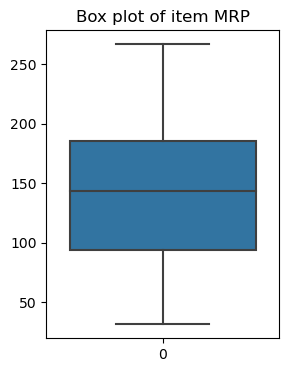

In [20]:
#Univarite Analysis on Item MRP.
plt.figure(figsize = (3,4))
sns.boxplot(df["Item_MRP"])
plt.title("Box plot of item MRP")
print(df["Item_MRP"].describe())

In [21]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [22]:
#Univariate analysis on Outlet identifier.
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [23]:
#Univariate analysis on Outlet identifier.
df["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

Text(0.5, 1.0, 'Cout plot of Outlet size.')

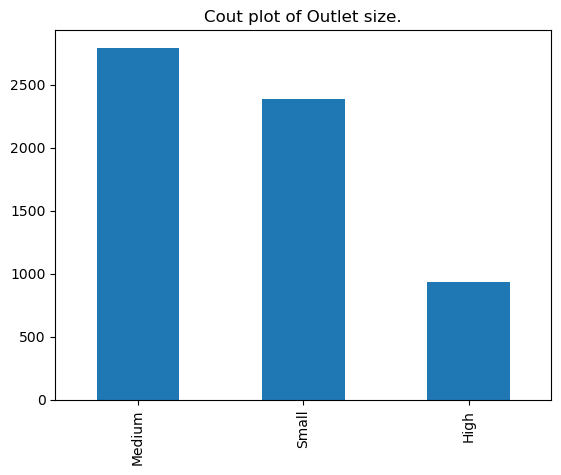

In [24]:
#Univariate analysis on Outlet Size.
(df["Outlet_Size"].value_counts()).plot(kind ="bar")
plt.title("Cout plot of Outlet size.")

Text(0.5, 1.0, 'Cout plot of Outlet location type.')

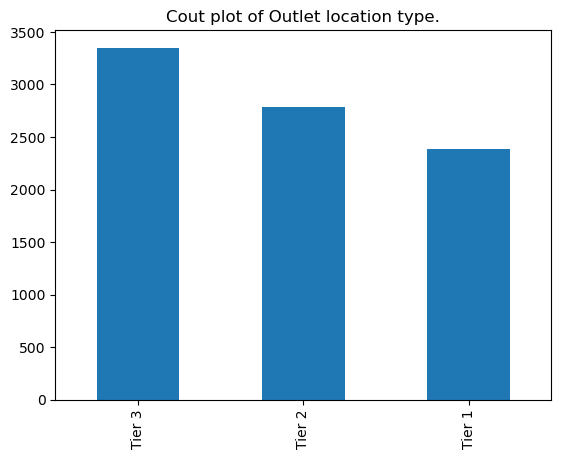

In [25]:
#Univariate analysis on Outlet Location type.
(df["Outlet_Location_Type"].value_counts()).plot(kind ="bar")
plt.title("Cout plot of Outlet location type.")

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


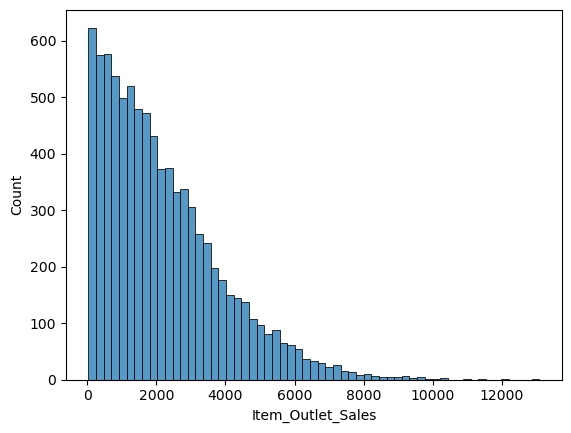

In [26]:
#Univariate analysis on Item outlet sales.
sns.histplot(data = df, x = df["Item_Outlet_Sales"])
print(df["Item_Outlet_Sales"].describe())

#### Bivariate Analyis of the attribute

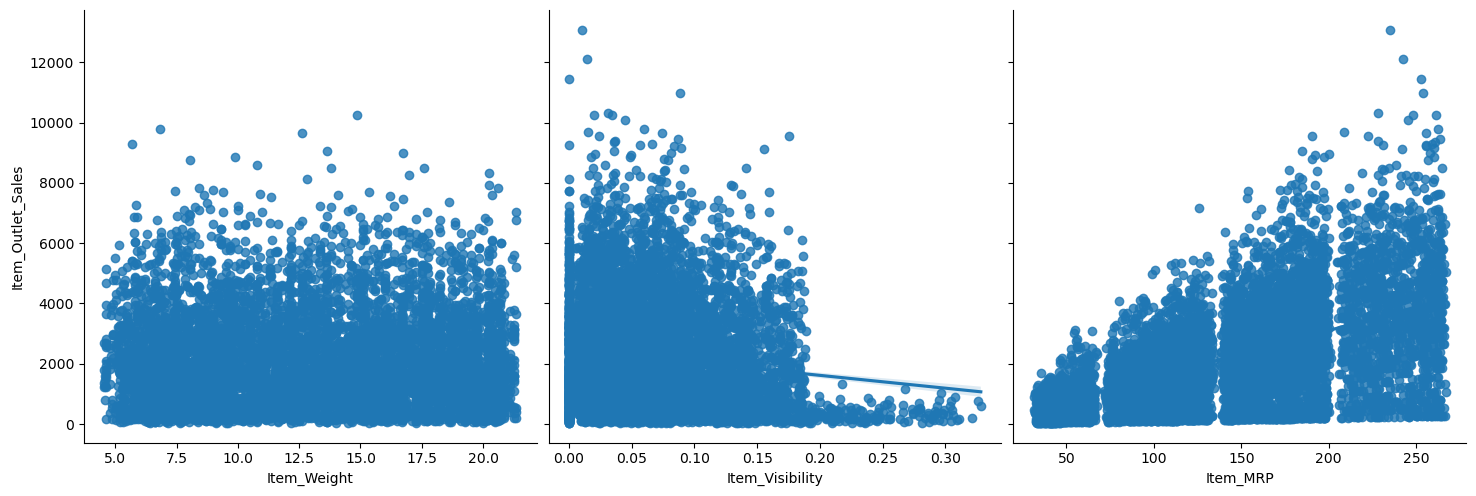

In [27]:
#Bivariate analysis on Sales vs Item_weight, Item visibility, Item MRP.
sns.pairplot(data = df, x_vars = ["Item_Weight", "Item_Visibility", "Item_MRP"],y_vars = "Item_Outlet_Sales", kind ="reg", height = 5)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

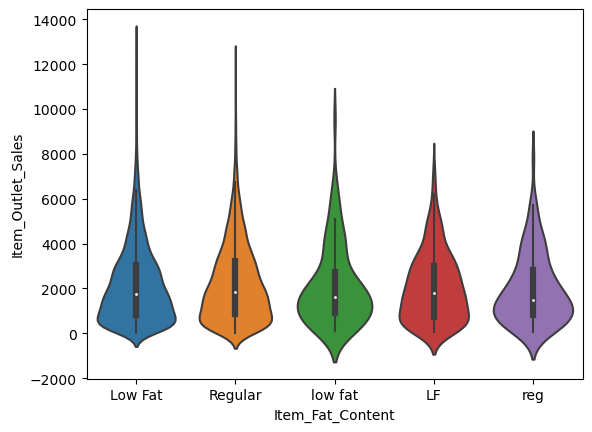

In [28]:
#Bivariate analysis on Sales vs Item_Fat_Content.
sns.violinplot(data = df, x = df["Item_Fat_Content"], y = df["Item_Outlet_Sales"])

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

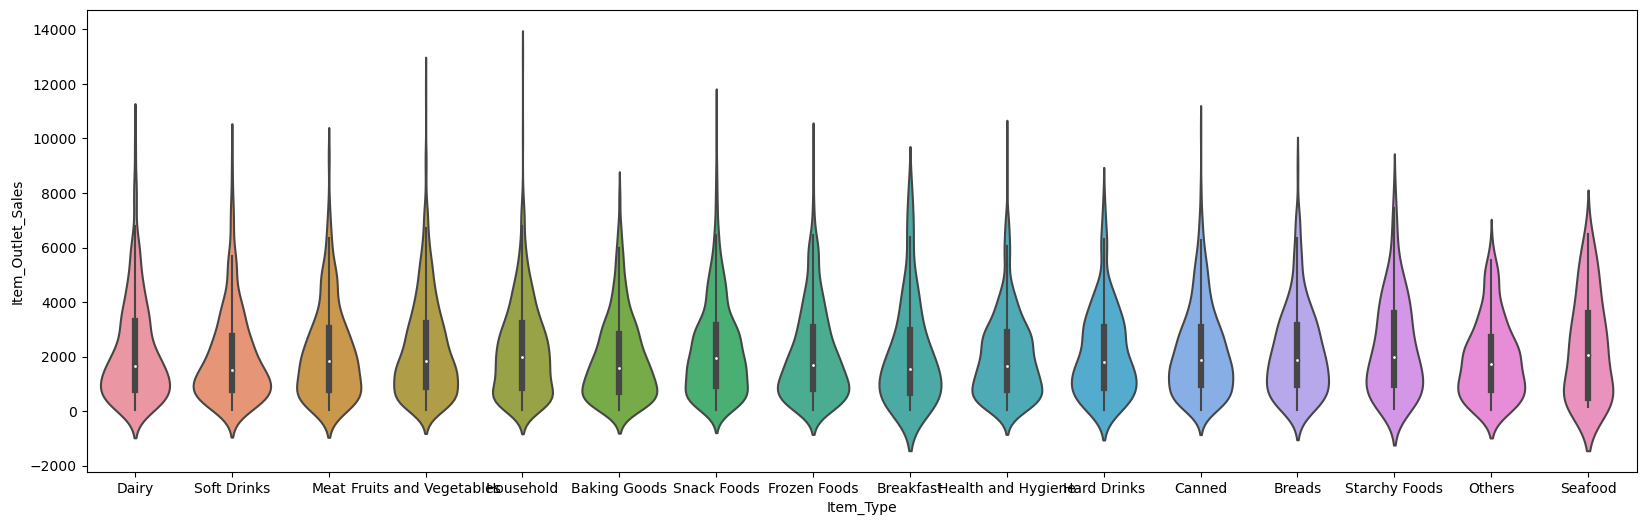

In [29]:
#Bivariate analysis on Sales vs Item_Type.
plt.figure(figsize = (20,6))
sns.violinplot(data = df, x = df["Item_Type"], y = df["Item_Outlet_Sales"])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

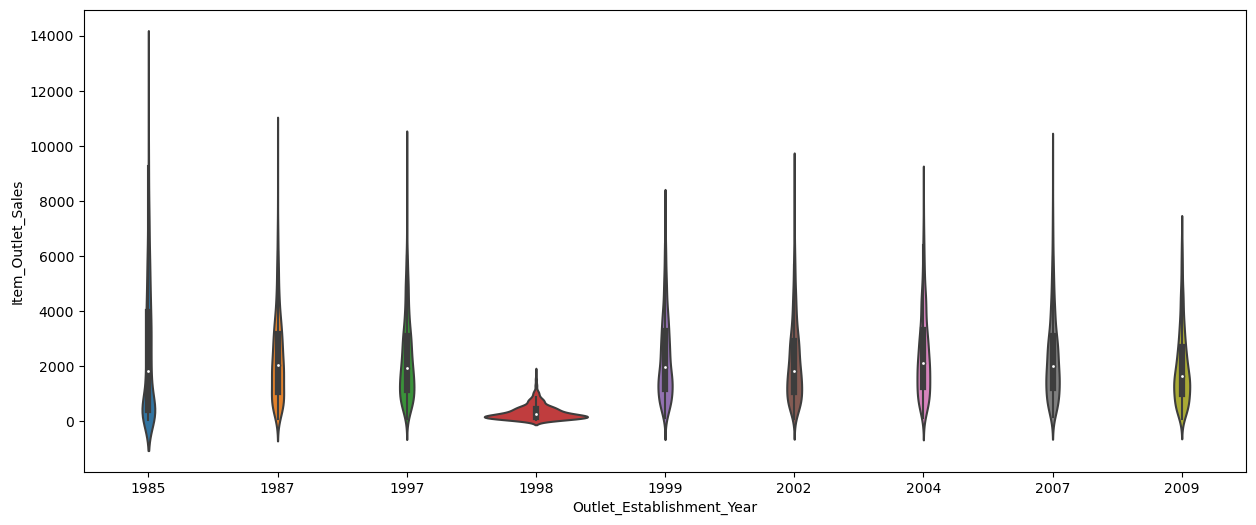

In [30]:
#Bivariate analysis on Sales vs Outlet_Establishment year.
plt.figure(figsize = (15,6))
sns.violinplot(data = df, x = df["Outlet_Establishment_Year"], y = df["Item_Outlet_Sales"])

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

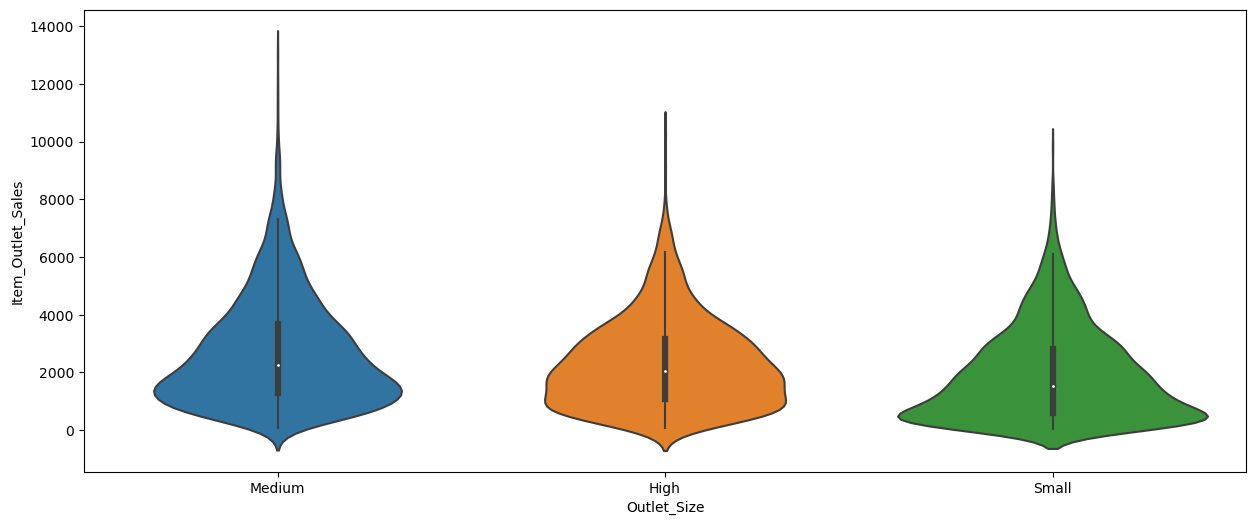

In [31]:
#Bivariate analysis on Sales vs Outlet_size.
plt.figure(figsize = (15,6))
sns.violinplot(data = df, x = df["Outlet_Size"], y = df["Item_Outlet_Sales"])

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

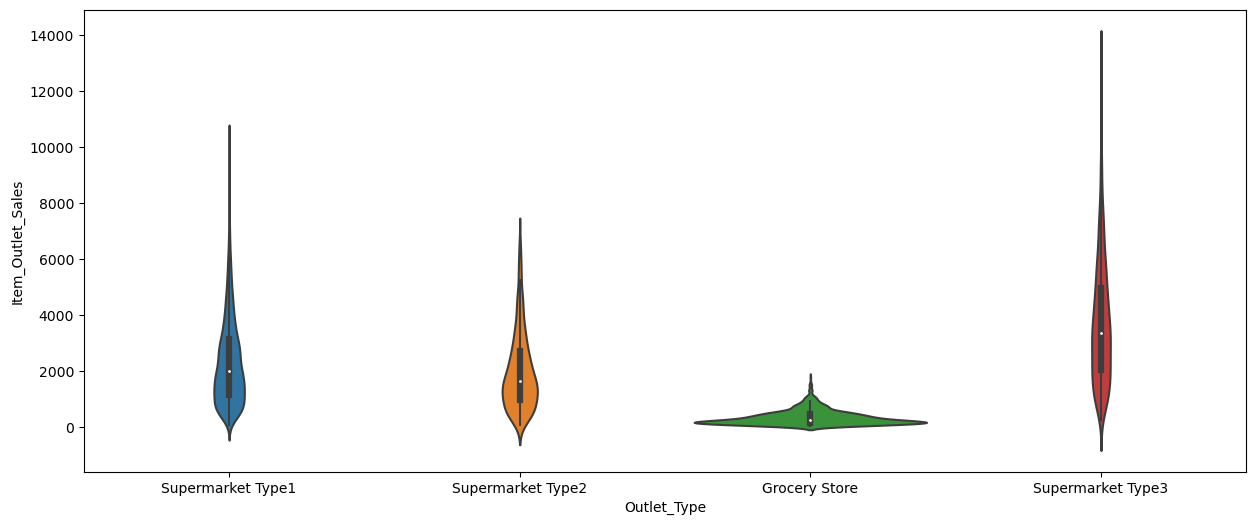

In [32]:
#Bivariate analysis on Sales vs Outlet type.
plt.figure(figsize = (15,6))
sns.violinplot(data = df, x = df["Outlet_Type"], y = df["Item_Outlet_Sales"])

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

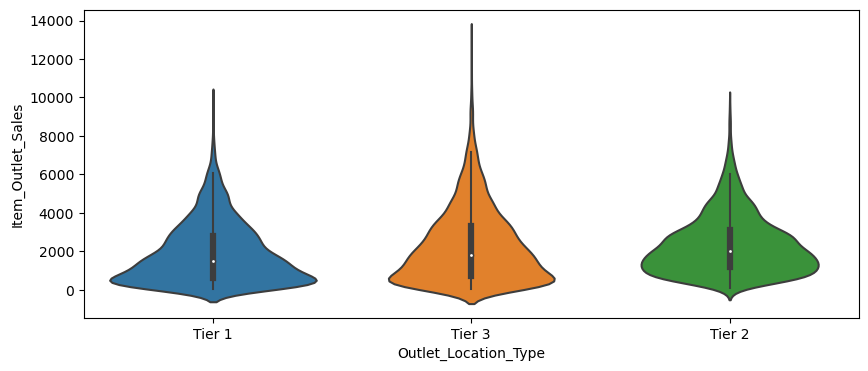

In [33]:
#Bivariate analysis on Sales vs Outlet location type.
plt.figure(figsize = (10,4))
sns.violinplot(data = df, x = df["Outlet_Location_Type"], y = df["Item_Outlet_Sales"])

/var/folders/2q/kt59brmn2g1db492_9qfxbh00000gn/T/ipykernel_8889/3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

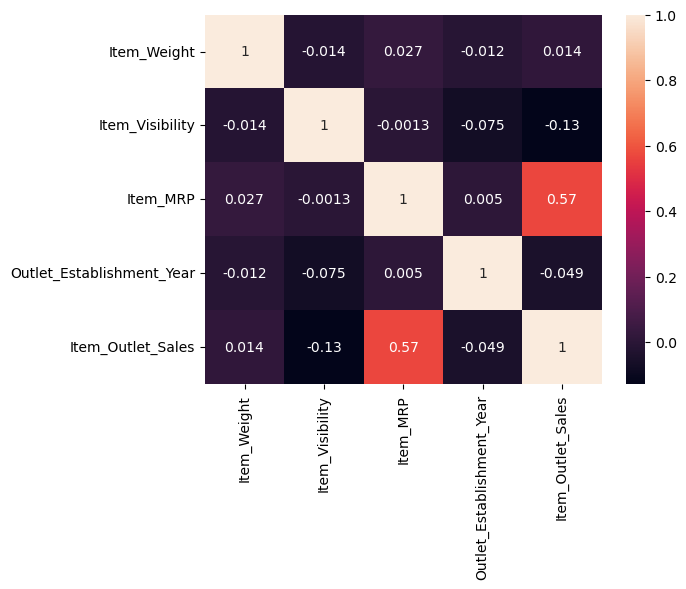

In [34]:
sns.heatmap(df.corr(), annot = True)

#### Data Preprocessing

In [35]:
#Filling null values in column Item_Weight.
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].median())
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [36]:
#Modifying the item fat content data.
print(df["Item_Fat_Content"].unique())
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['low fat', 'LF'],'Low Fat')
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['reg'],'Regular')
print(df["Item_Fat_Content"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular']


In [37]:
#Treating outlier on the attribute item visibility.
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [38]:
#Creating a new column outlet year
df['Outlet_Year'] = 2034 - df['Outlet_Establishment_Year']

/var/folders/2q/kt59brmn2g1db492_9qfxbh00000gn/T/ipykernel_8889/2263077920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Year'] = 2034 - df['Outlet_Establishment_Year']


In [39]:
#Fill null values on colum Outlet_size.
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])
print(df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Year                  0
dtype: int64


/var/folders/2q/kt59brmn2g1db492_9qfxbh00000gn/T/ipykernel_8889/4282696846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])


In [40]:
#Drop the unnecessary column.
df = df.drop(columns = ["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"])
df

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  \
0     249.8092      Medium               Tier 1  Supermarket Type1   
1      48.2692      Medium               Tier 3  Supermarket Type2   
2     141.6180      Medium               Tier 1  Supermarket Type1   
3     182.0950      Medium               Tier 3      Grocery Store   
4      53.8614        High               Tier 3  Supermarket Type1   
...        ...         ...                  ...                ...   
8518  214.5218        High               Tier 3  Supermarket Type1   
8519  108.1570      Medium               Tier 2  Supermarket Type1   
8520   85.1224       Small               Tier 2  Supermarket Type1   
8521  103.1332      Medium               Tier 3  Supermarket Type2   
8522   75.4670       Small               Tier 1  Supermarket Type1   

      Item_Outlet_Sales  Outlet_Year  
0             3735.1380           35  
1              443.4228           25  
2             2097.2700           35  
3              732.3800           36  
4              994.7052           47  
...                 ...          ...  
8518          2778.3834           47  
8519           549.2850           32  
8520          1193.1136           30  
8521          1845.5976           25  
8522           765.6700           37  

[8379 rows x 10 columns]

In [41]:
#Creating dummy column for the attributes "Item_Fat_Content", "Item_Type", "Outlet_Size","Outlet_Location_Type","Outlet_Type".
df = pd.get_dummies(data = df, columns = ["Item_Fat_Content", "Item_Type", "Outlet_Size","Outlet_Location_Type","Outlet_Type" ], drop_first = True)

In [42]:
df

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_Year  \
0           9.300         0.016047  249.8092          3735.1380           35   
1           5.920         0.019278   48.2692           443.4228           25   
2          17.500         0.016760  141.6180          2097.2700           35   
3          19.200         0.000000  182.0950           732.3800           36   
4           8.930         0.000000   53.8614           994.7052           47   
...           ...              ...       ...                ...          ...   
8518        6.865         0.056783  214.5218          2778.3834           47   
8519        8.380         0.046982  108.1570           549.2850           32   
8520       10.600         0.035186   85.1224          1193.1136           30   
8521        7.210         0.145221  103.1332          1845.5976           25   
8522       14.800         0.044878   75.4670           765.6700           37   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            1                 0                    0   
4                            0                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  ...  Item_Type_Snack Foods  \
0                    0                1  ...                      0   
1                    0                0  ...                      0   
2                    0                0  ...                      0   
3                    0                0  ...                      0   
4                    0                0  ...                      0   
...                ...              ...  ...                    ...   
8518                 0                0  ...                      1   
8519                 0                0  ...                      0   
8520                 0                0  ...                      0   
8521                 0                0  ...                      1   
8522                 0                0  ...                      0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_Medium  \
0                         0                        0                   1   
1                         1                        0                   1   
2                         0                        0                   1   
3                         0                        0                   1   
4                         0                        0                   0   
...                     ...                      ...                 ...   
8518                      0                        0                   0   
8519                      0                        0                   1   
8520                      0                        0                   0   
8521                      0                        0                   1   
8522                      1                        0                   0   

      Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
0                     0                            0   
1                     0                            0   
2                     0                            0   
3                     0                            0   
4                     0                            0   
...                 ...                          ...   
8518      

In [ ]:
#Splitting the dependent and independent variables in the dataset.
x = df.drop("Item_Outlet_Sales",axis = 1)
y = df["Item_Outlet_Sales"]

In [ ]:
#Import test data.
df_test = pd.read_csv("bigmart_test.csv")
df_test.head()

In [ ]:
#Check for the null values.
df_test.isna().sum()

In [ ]:
#Filling null values in column Item_Weight.
df_test["Item_Weight"] = df_test["Item_Weight"].fillna(df_test["Item_Weight"].median())
print(df_test.isna().sum())

In [ ]:
#Modifying the item fat content data.
print(df_test["Item_Fat_Content"].unique())
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace(['low fat', 'LF'],'Low Fat')
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace(['reg'],'Regular')
print(df_test["Item_Fat_Content"].unique())

In [ ]:
#Creating a new column outlet year
df_test['Outlet_Year'] = 2023 - df_test['Outlet_Establishment_Year']

In [ ]:
#Filling the null values in column Outlet size.
df_test["Outlet_Size"] = df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0])
print(df_test.isna().sum())

In [ ]:
#Drop the unnecessary column.
df_test = df_test.drop(columns = ["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"])
df_test

In [ ]:
#Create dummies column of test data.
x_test = pd.get_dummies(data = df_test, columns = ["Item_Fat_Content", "Item_Type", "Outlet_Size","Outlet_Location_Type","Outlet_Type" ], drop_first = True)
x_test

In [ ]:
#Import and fitting the Linear Regression model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
print(model.intercept_)
print(model.coef_)

In [ ]:
#Predecting the test data.
y_pred = model.predict(x_test)
y_pred

In [ ]:
#Calculate the rmse value and r2_score of the model.
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,model.predict(x)))
print("The root mean square error of the train data is {}".format(rmse))
print("The r2 vale/ cofficient of determination is {}".format(r2_score(y,model.predict(x))))

In [ ]:
#Import Lasso Regression model.
from sklearn.linear_model import Lasso
model_1 = Lasso(alpha = 0.02)
model_1.fit(x,y)
print(model.intercept_)
print(model.coef_)

In [ ]:
#Test data prediction.
y_pred = model_1.predict(x_test)
y_pred

In [ ]:
#Calculate the rmse value and r2_score of the model.
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,model_1.predict(x)))
print("The root mean square error of the train data is {}".format(rmse))
print("The r2 vale/ cofficient of determination is {}".format(r2_score(y,model_1.predict(x))))

In [ ]:
#Import Ridge Regression model.
from sklearn.linear_model import Ridge
model_2 = Ridge(alpha = 0.01)
model_2.fit(x,y)
print(model_2.intercept_)
print(model_2.coef_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,model_2.predict(x)))
print("The root mean square error of the train data is {}".format(rmse))
print("The r2 vale/ cofficient of determination is {}".format(r2_score(y,model_2.predict(x))))

In [ ]:
#Import Elastic Net model.
from sklearn.linear_model import ElasticNet
model_3 = Ridge(alpha = 0.01)
model_3.fit(x,y)
print(model_3.intercept_)
print(model_3.coef_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,model_3.predict(x)))
print("The root mean square error of the train data is {}".format(rmse))
print("The r2 vale/ cofficient of determination is {}".format(r2_score(y,model_3.predict(x))))

In [ ]:
#Import Gradient Boost Regression.
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 3000, max_depth = 4)
model.fit(x, y)

In [ ]:
rmse = np.sqrt(mean_squared_error(y,model.predict(x)))
print("The root mean square error of the train data is {}".format(rmse))
print("The r2 vale/ cofficient of determination is {}".format(r2_score(y,model.predict(x))))

In [ ]:
model.predict(x_test)